
# Vector beams notebook

Some vector beams fun...

In [1]:
using Plots
using BenchmarkTools
#using Luxor
include("/mnt/bendata/Documents/Docs/PhysicsLocal/PCVB/Beams.jl")
include("/mnt/bendata/Documents/Docs/PhysicsLocal/SpiralPropagation/PolarizationLib.jl")
pyplot()

┌ Info: Recompiling stale cache file /home/ben/.julia/compiled/v1.0/Luxor/HA9ps.ji for Luxor [ae8d54c2-7ccd-5906-9d76-62fc9837b5bc]
└ @ Base loading.jl:1190


Plots.PyPlotBackend()

Lets define the vector beams as
$$ E(r,\theta) = (\alpha-i\beta)LG_{-l}(r,\theta)\hat{e}_L + (\alpha +i\beta)LG_{+l}(r,\theta)\hat{e}_R,$$
where $LG_l$ is the Laguerre-Gauss beam with azimuthal order $l$, $\alpha=\cos{\gamma}$ and $\beta=\sin{\gamma}\exp{i\phi_B}$

In [70]:
# Parameters
gamm = pi/4
phiB = 0
phi0 = 0.
alph = cos(gamm)
bett = sin(gamm) * exp(im*phiB)
w0 = 0.5
l = 1

# Size of numerical window in terms of circle size
xmax = 2*w0
points = 512

# Generates ranges for xs and ys
xs = xmax*(2/points)*collect(range(-points/2,length=points,stop=points/2-1))
ys = xmax*(2/points)*collect(range(-points/2,length=points,stop=points/2-1))

# Coordinates
mx, ny = length(xs), length(ys)
Xs = reshape(xs, mx, 1)
Ys = reshape(ys, 1, ny)

# Fields
el = LaguerreGaussBeam.(Xs, Ys, w0, -phi0, -l, 0);
er = LaguerreGaussBeam.(Xs, Ys, w0, phi0, l, 0);
#el = el ./ sum.(el);
#er = er ./ sum.(er);

EL = (alph - im*bett) .* el;
ER = (alph + im*bett) .* er;

We compute the Stokes parameters

In [71]:
# Input Stokes parameters
S0 = abs2.(ER) + abs2.(EL)
S1 = 2*real.(EL .* conj.(ER))
S2 = -2*imag.(EL .* conj.(ER))
S3 = abs2.(ER) - abs2.(EL);

# Input Stokes Field
S = S1 + im.*S2;

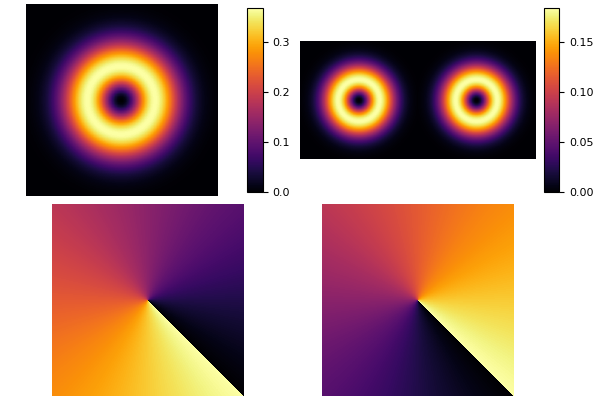

In [72]:
# Input visualization
P1 = heatmap(S0, aspect_ratio=1, colorbar=true, axis=:off)
P2 = heatmap([abs2.(EL) abs2.(ER)], aspect_ratio=1, colorbar=true, axis=:off)
P3 = heatmap(angle.(EL), aspect_ratio=1, colorbar=false, axis=:off)
P4 = heatmap(angle.(ER), aspect_ratio=1, colorbar=false, axis=:off)
plot(P1,P2,P3,P4, layout=(2,2))

We want to see the polarization map, therefore, we compute the parameters of the ellipses in each pixel.  The following is a function to perform such task.

In [59]:
PolMap(S0,S1,S2,S3,true,"spiral1.pdf",2^4);

! SyncTeX Error : No file?


## Streamlines

In [73]:
# Fields in linear basis
EX = (sqrt(2)/2) .* (EL .+ ER)
EY = (sqrt(2)/(2*im)) .* (EL .- ER);

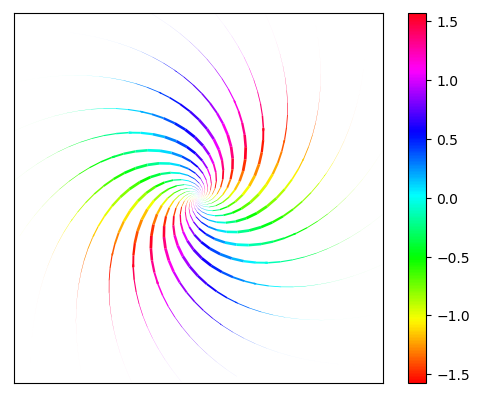

In [74]:
# Intesity and phase of Stokes field
IT = 2 * S0 ./ maximum(S0)
PH = angle.(S)/2

# Starting points
radiusx = 0.8
radiusy = 0.8

#PyPlot.pcolor(xs, ys, zeros(points,points), cmap=:gray)
#PyPlot.pcolor(xs, ys, IT.^1, cmap=:Greys)
hm = 20
for stt=0 .+ range(0,length=hm,stop=2pi-2pi/hm)
    
       # Generate tuple with starting points  HIGHLY NON EFFICIENT!  but works... 
       stx = radiusx * cos(stt)
       sty = radiusy * sin(stt)
       st = ((stx, sty),(stx, sty))
       
       # Stramlines
       PyPlot.streamplot(xs, ys, real.(EX), real.(EY),
                       color=PH, cmap=:hsv, 
                       linewidth=(IT.^1), arrowsize=0.01, start_points=st)
end
PyPlot.xticks([])
PyPlot.yticks([])
PyPlot.axis("square")
PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("on");
PyPlot.colorbar()

savestuff=false
if savestuff
    PyPlot.savefig("thblender.png", 
                    format="png", bbox_inches="tight", 
                    transparent="True", pad_inches=0.0, dpi=600)
end

Simulation of the evolution of the electric field lines

In [184]:
filelastname="SimSpiral"

# Intesity and phase of Stokes field
IT = 1.4 * s0 ./ maximum(s0)
PH = angle.(S)/2

# Starting points
limitx = 0.9

# Number of starting points (~streamlines)
hm = 15
TT = 120

radiusx = 0.5
radiusy = 0.5

th = range(0,length=hm,stop=2pi-2pi/hm)

# Generate starting points
stx = radiusx .* cos.(th)
sty = radiusy .* sin.(th)

# Generate starting points... FOR THIS PARTICULAR GEOMETRY!!!
# stx = range(-limitx,length=hm,stop=limitx)
# sty = limitx .* ones(hm,1)
# sty[div(hm,2):end,1] .= -limitx

#PyPlot.pcolor(xs, ys, zeros(points,points), cmap=:gray)
#PyPlot.pcolor(xs, ys, IT.^1, cmap=:Greys)

thets=range(0,length=TT,stop=2pi)
for ii=1:TT
    PyPlot.pcolor(xs, ys, zeros(points,points), cmap=:gray)
    for stt=1:hm
           # Generates tuples from starting points
           st = ((stx[stt], sty[stt]),(stx[stt], sty[stt]))

           # Stramlines
           PyPlot.streamplot(xs, ys, real.(exp(im*thets[ii]) .* EX), real.(exp(im*thets[ii]) .* EY),
                           color=PH, cmap=:hsv, 
                           linewidth=(IT), arrowsize=0.01, start_points=st)
    end
    PyPlot.axis("square")
    PyPlot.axis([-xmax, xmax, -xmax, xmax]);
    PyPlot.axis("off")
    PyPlot.xticks([])
    PyPlot.yticks([])
    PyPlot.savefig("$(filelastname)-propDE-$(ii).jpg", 
                    format="jpg", bbox_inches="tight", 
                    transparent="False", pad_inches=0.0, dpi=90)
    PyPlot.clf()
end

## Propagation through anisotropic media

Now, we will propagate the field throught some wave plates.  For that, we define such functions.

In [22]:
thhwp = 0
thqwp = -pi/8
EXprop, EYprop = EX, EY
EXprop, EYprop = Halfwaveplate(EXprop, EYprop, thhwp)
EXprop, EYprop = Quarterwaveplate(EXprop, EYprop, thqwp)
#EXprop, EYprop = Quarterwaveplate(EXprop, EYprop, pi);
#EXprop, EYprop = Quarterwaveplate(EXprop, EYprop, pi/4);

Compute Stokes parameters of the propagated beam

In [23]:
# Input Stokes parameters
s0p = abs2.(EXprop) + abs2.(EYprop)
s1p = abs2.(EXprop) - abs2.(EYprop)
s2p = 2*real.(EXprop .* conj.(EYprop))
s3p = -2*imag.(EXprop .* conj.(EYprop))

# Input Stokes Field
Sp = s1p + im.*s2p;

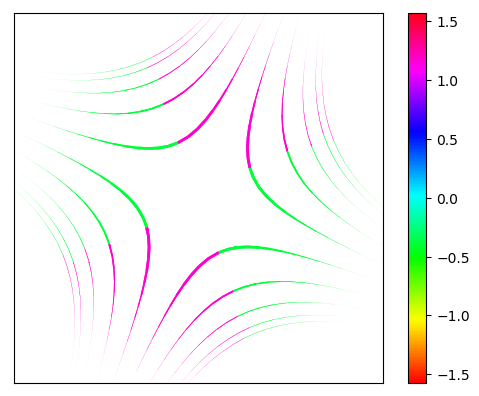

In [24]:
# Intesity and phase of Stokes field
ITp = 2 * s0p ./ maximum(s0p)
PHp = angle.(Sp)/2

# This allows to fix the colormap in the range of [-pi,pi]
PHp[1,1]=pi/2
PHp[1,2]=-pi/2

# Starting points
limitx = 0.9

# Number of starting points (~streamlines)
hm = 20

# Generate starting points... FOR THIS PARTICULAR GEOMETRY!!!
#stx = range(-limitx,length=hm,stop=limitx)
#sty = limitx .* ones(hm,1)
#sty[div(hm,2):end,1] .= -limitx
th = range(0,length=hm,stop=2pi-2pi/hm)
stx = radiusx .* cos.(th)
sty = radiusy .* sin.(th)

#PyPlot.pcolor(xs, ys, zeros(points,points), cmap=:gray)
#PyPlot.pcolor(xs, ys, IT.^1, cmap=:Greys)
for stt=1:hm
       # Generates tuples from starting points
       st = ((stx[stt], sty[stt]),(stx[stt], -sty[stt]))
       
       # Stramlines
       PyPlot.streamplot(xs, ys, real.(EXprop), real.(EYprop),
                       color=PHp, cmap=:hsv,
                       linewidth=(ITp), arrowsize=0.01, start_points=st)

end
PyPlot.axis("square")
PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("on")
PyPlot.colorbar()
# Removes white space sorroundung the figure... HAAAARD TO FIND THIS ONE
PyPlot.xticks([])
PyPlot.yticks([]);

savestuff=false
if savestuff
    PyPlot.savefig("thpropblender.png", 
                    format="png", bbox_inches="tight", 
                    transparent="True", pad_inches=0.0, dpi=600)
end

Polarization map!

In [53]:
PolMap(s0p,s1p,s2p,s3p,true,"Propspiral1.pdf")

! SyncTeX Error : No file?


"/mnt/bendata/Documents/Docs/PhysicsLocal/SpiralPropagation/Propspiral1.pdf"

! SyncTeX Error : No file?


Simulation of the field evolution

In [18]:
filelastname="SimProp"

# Intesity and phase of Stokes field
ITp = 1.4 * s0p ./ maximum(s0p)
PHp = angle.(Sp)/2

# Starting points
limitx = 0.9

# Number of starting points (~streamlines)
hm = 30
TT = 120

radiusx = 0.9
radiusy = 0.9

th = range(0,length=hm,stop=2pi-2pi/hm)

# Generate starting points
stx = radiusx .* cos.(th)
sty = radiusy .* sin.(th)

# Generate starting points... FOR THIS PARTICULAR GEOMETRY!!!
# stx = range(-limitx,length=hm,stop=limitx)
# sty = limitx .* ones(hm,1)
# sty[div(hm,2):end,1] .= -limitx

#PyPlot.pcolor(xs, ys, zeros(points,points), cmap=:gray)
#PyPlot.pcolor(xs, ys, IT.^1, cmap=:Greys)

thets=range(0,length=TT,stop=2pi)
for ii=1:TT
    PyPlot.pcolor(xs, ys, zeros(points,points), cmap=:gray)
    for stt=1:hm
           # Generates tuples from starting points
           st = ((stx[stt], sty[stt]),(stx[stt], -sty[stt]))

           # Stramlines
           PyPlot.streamplot(xs, ys, real.(exp(im*thets[ii]) .* EXprop), real.(exp(im*thets[ii]) .* EYprop),
                           color=PHp, cmap=:hsv, 
                           linewidth=(ITp), arrowsize=0.01, start_points=st)

    end
    PyPlot.axis("square")
    PyPlot.axis([-xmax, xmax, -xmax, xmax]);
    PyPlot.axis("off")
    PyPlot.xticks([])
    PyPlot.yticks([])
    PyPlot.savefig("$(filelastname)-propDE-$(ii).jpg", 
                    format="jpg", bbox_inches="tight", 
                    transparent="False", pad_inches=0.0, dpi=90)
    PyPlot.clf()
end

# Experimental data

Now, lets load the results in circular polarization basis

In [25]:
using HDF5

In [26]:
# Result type
filelastname="spiral2"

# Load data
ALe = h5read("ampEL-$(filelastname).h5", "/DSL")
ARe = h5read("ampER-$(filelastname).h5", "/DSL")
phLe = h5read("phaseEL-$(filelastname).h5", "/DSL")
phRe = h5read("phaseER-$(filelastname).h5", "/DSL");

In [27]:
# Load experimental amplitude and phase
BLe = ALe .* exp.(im.*phLe)
BRe = ARe .* exp.(im.*phRe);

# The data from matlab comes inverted 
ELe = BRe
ERe = BLe;

Change to linear basis

In [28]:
# Fields in linear basis (experimental data)
EXe = (sqrt(2)/2) .* (ELe .+ ERe)
EYe = (sqrt(2)/(2*im)) .* (ELe .- ERe);

We compute the Stokes parameters and visualize them

In [29]:
# Input Stokes parameters
s0e = abs2.(ERe) + abs2.(ELe)
s1e = 2*real.(ELe .* conj.(ERe))
s2e = -2*imag.(ELe .* conj.(ERe))
s3e = abs2.(ERe) - abs2.(ELe);

# Input Stokes Field
Se = s1e + im.*s2e;

Generate figures for paper

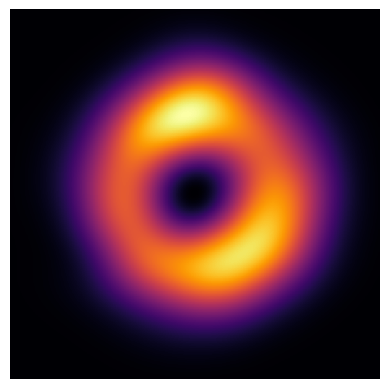

In [34]:
facto = maximum([abs2.(ELe) abs2.(ERe)])
ELe[1,1] = facto
ERe[1,1] = facto

# Input visualization
PyPlot.pcolormesh(abs2.(ELe), cmap=:inferno)
PyPlot.axis("square")
#PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("off")
PyPlot.xticks([])
PyPlot.yticks([])
PyPlot.savefig("ExpEL-$(filelastname).png", 
            format="png", bbox_inches="tight", 
            transparent="False", pad_inches=0.0, dpi=300)

PyPlot.pcolormesh(abs2.(ERe), cmap=:inferno)
PyPlot.axis("square")
#PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("off")
PyPlot.xticks([])
PyPlot.yticks([])
PyPlot.savefig("ExpER-$(filelastname).png", 
            format="png", bbox_inches="tight", 
            transparent="False", pad_inches=0.0, dpi=300)

PyPlot.pcolormesh(angle.(ELe), cmap=:inferno)
PyPlot.axis("square")
#PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("off")
PyPlot.xticks([])
PyPlot.yticks([])
PyPlot.savefig("ExpAngleEL-$(filelastname).png", 
            format="png", bbox_inches="tight", 
            transparent="False", pad_inches=0.0, dpi=300)

PyPlot.pcolormesh(angle.(ERe), cmap=:inferno)
PyPlot.axis("square")
#PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("off")
PyPlot.xticks([])
PyPlot.yticks([])
PyPlot.savefig("ExpAngleER-$(filelastname).png", 
            format="png", bbox_inches="tight", 
            transparent="False", pad_inches=0.0, dpi=300)

# HERE WE PLOT S0... 
PyPlot.pcolormesh(s0e, cmap=:inferno)
PyPlot.axis("square")
#PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("off")
#PyPlot.colorbar()
PyPlot.xticks([])
PyPlot.yticks([])
PyPlot.savefig("ExpS0-$(filelastname).png", 
            format="png", bbox_inches="tight", 
            transparent="False", pad_inches=0.0, dpi=300)

In [31]:
# Size of numerical window in terms of circle size
w0 = 0.5
xmax = 2*w0
points = 512

# Generates ranges for xs and ys
xs = xmax*(2/points)*collect(range(-points/2,length=points,stop=points/2-1))
ys = xmax*(2/points)*collect(range(-points/2,length=points,stop=points/2-1));

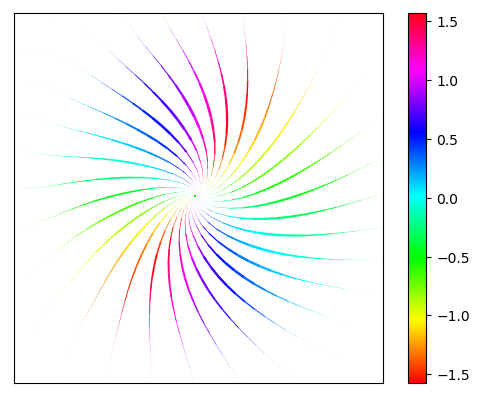

In [35]:
# Intesity and phase of Stokes field
ITe = 2 * s0e ./ maximum(s0e)
PHe = angle.(Se)/2

# Starting points
radiusx = 0.5
radiusy = 0.5

# Number of starting points
hm = 30
th = range(0,length=hm,stop=2pi-2pi/hm)

# Generate starting points
stx = radiusx .* cos.(th)
sty = radiusy .* sin.(th)

#PyPlot.pcolor(xs, ys, zeros(points,points), cmap=:gray)
#PyPlot.pcolor(xs, ys, ITe.^1, cmap=:Greys)
for stt = 1:hm
        
        # Generate tuple with starting points  HIGHLY NON EFFICIENT!  but works... 
        st = ((stx[stt],sty[stt]),(stx[stt],sty[stt]))
        
        # Streamlines
        PyPlot.streamplot(xs, ys, real.(EXe), real.(EYe),
                        color=PHe, cmap=:hsv, 
                        linewidth=(ITe.^1), arrowsize=0.01, start_points=st)
end

PyPlot.axis("square")
PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("on")
PyPlot.colorbar()

# Removes white space sorroundung the figure... HAAAARD TO FIND THIS ONE
PyPlot.xticks([])
PyPlot.yticks([])

savestuff=false
if savestuff
    PyPlot.savefig("$(filelastname).png", 
                    format="png", bbox_inches="tight", 
                    transparent="True", pad_inches=0.0, dpi=600)
end

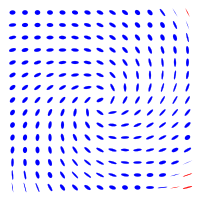

In [33]:
PolMap(s0e, s1e, s2e, s3e, true, "ExperimentalSpiral2.svg")

Digital propagation case

In [9]:
# CASE 1
thhwp = 0
thqwp = -pi/8
EXpropDE, EYpropDE = EXe, EYe
EXpropDE, EYpropDE = Halfwaveplate(EXpropDE, EYpropDE, thhwp);
EXpropDE, EYpropDE = Quarterwaveplate(EXpropDE, EYpropDE, thqwp);

In [36]:
# CASE 2
thqwp1 = pi
thqwp2 = pi/4
EXpropDE, EYpropDE = EXe, EYe
EXpropDE, EYpropDE = Quarterwaveplate(EXpropDE, EYpropDE, thqwp1);
EXpropDE, EYpropDE = Quarterwaveplate(EXpropDE, EYpropDE, thqwp2);

Change basis!!

In [37]:
# Linear -- Circular basis
ELpde = (1/sqrt(2)) .* (EXpropDE .+ im.*EYpropDE)
ERpde = (1/sqrt(2)) .* (EXpropDE .- im.*EYpropDE);

In [38]:
# Input Stokes parameters
s0pe = abs2.(EXpropDE) + abs2.(EYpropDE)
s1pe = abs2.(EXpropDE) - abs2.(EYpropDE)
s2pe = 2*real.(EXpropDE .* conj.(EYpropDE))
s3pe = -2*imag.(EXpropDE .* conj.(EYpropDE))

# Input Stokes Field
Spe = s1pe + im.*s2pe;

Show field

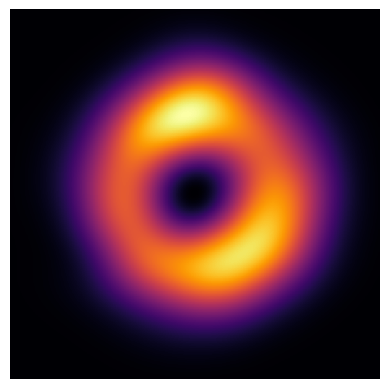

In [11]:
filelastnamep = "spiralprop2"

factop = maximum([abs2.(ELpde) abs2.(ERpde)])
ELpde[1,1] = factop
ERpde[1,1] = factop

PyPlot.pcolormesh(abs2.(ELpde), cmap=:inferno)
PyPlot.axis("square")
#PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("off")
PyPlot.xticks([])
PyPlot.yticks([])
PyPlot.savefig("ExpEL-$(filelastnamep).png", 
            format="png", bbox_inches="tight", 
            transparent="False", pad_inches=0.0, dpi=300)

PyPlot.pcolormesh(abs2.(ERpde), cmap=:inferno)
PyPlot.axis("square")
#PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("off")
PyPlot.xticks([])
PyPlot.yticks([])
PyPlot.savefig("ExpER-$(filelastnamep).png", 
            format="png", bbox_inches="tight", 
            transparent="False", pad_inches=0.0, dpi=300)

PyPlot.pcolormesh(angle.(ELpde), cmap=:inferno)
PyPlot.axis("square")
#PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("off")
PyPlot.xticks([])
PyPlot.yticks([])
PyPlot.savefig("ExpAngleEL-$(filelastnamep).png", 
            format="png", bbox_inches="tight", 
            transparent="False", pad_inches=0.0, dpi=300)

PyPlot.pcolormesh(angle.(ERpde), cmap=:inferno)
PyPlot.axis("square")
#PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("off")
PyPlot.xticks([])
PyPlot.yticks([])
PyPlot.savefig("ExpAngleER-$(filelastnamep).png", 
            format="png", bbox_inches="tight", 
            transparent="False", pad_inches=0.0, dpi=300)

# HERE WE PLOT S0... 
PyPlot.pcolormesh(s0pe, cmap=:inferno)
PyPlot.axis("square")
#PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("off")
PyPlot.xticks([])
PyPlot.yticks([])
PyPlot.savefig("ExpS0-$(filelastnamep).png", 
            format="png", bbox_inches="tight", 
            transparent="False", pad_inches=0.0, dpi=300);

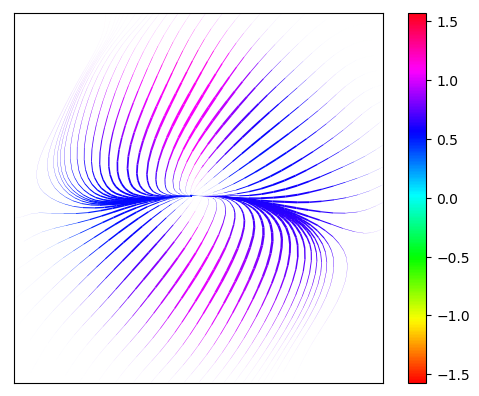

In [39]:
# Intesity and phase of Stokes field
ITpe = 2 * s0pe ./ maximum(s0pe)
PHpe = angle.(Spe)/2
PHpe[1,1] = pi/2
PHpe[1,2] = -pi/2


# Starting points
limitx = 0.95
limity = 0.95
radiusx = 0.8
radiusy = 0.8

# Number of starting points (~streamlines)
hm = 60

# Generate starting points fpor propagated spiral case
#stx = range(-limitx,length=hm,stop=limitx)
#sty = limitx .* ones(hm,1)
#sty[div(hm,2):end,1] .= -limitx

# Generate starting points for spiral symmetry
th = range(0,length=hm,stop=2pi-2pi/hm)
stx = radiusx .* cos.(th)
sty = radiusy .* sin.(th)

# GENERATE POINTS FOR SADDLE... 
#stx = range(0,length=hm,stop=limitx)
#sty = limitx .* ones(hm,1)

#PyPlot.pcolor(xs, ys, zeros(points,points), cmap=:gray)
#PyPlot.pcolor(xs, ys, IT.^1, cmap=:Greys)
for stt = 1:hm
    
       # Generate tuple with starting points  HIGHLY NON EFFICIENT!  but works... 
       st = ((stx[stt], sty[stt]),(stx[stt], sty[stt]))
       
       # Stramlines
       PyPlot.axis("off")
       PyPlot.streamplot(xs, ys, real.(EXpropDE), real.(EYpropDE),
                       color=PHpe, cmap=:hsv, 
                       linewidth=(ITpe), arrowsize=0.01, start_points=st)
end

# For visualization
PyPlot.axis("square")
PyPlot.axis([-xmax, xmax, -xmax, xmax]);
PyPlot.axis("on")
PyPlot.colorbar()

# Removes white space sorroundung the figure... HAAAARD TO FIND THIS ONE
PyPlot.xticks([])
PyPlot.yticks([])

savestuff=false
if savestuff
    PyPlot.savefig("$(filelastnamep)-propDE.png", 
                    format="png", bbox_inches="tight", 
                    transparent="True", pad_inches=0.0, dpi=600)
end

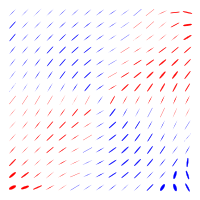

In [12]:
PolMap(s0pe, s1pe, s2pe, s3pe, true, "Propagation2.svg")